In [1]:
import sys
print("MapStitching here")



MapStitching here


In [2]:
import sys
try:
    import numpy as np
except:
    print('numpy error')
    try:
        !conda install --yes --prefix {sys.prefix} numpy
    except:
        !{sys.executable} -m pip install numpy
    import numpy as np

try:
    import cv2 as cv
except:
    print('opencv error')
    try:
        !conda install --yes --prefix {sys.prefix} opencv
    except:
        !{sys.executable} -m pip install opencv-python
    import cv2 as cv

try:
    import matplotlib.pyplot as plt
except:
    print('matplotlib error')
    try:
        !conda install --yes --prefix {sys.prefix} matplotlib
    except:
        !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import glob
except:
    print('glob error')
    try:
        !{sys.executable} -m pip install glob
    except:
        !conda install --yes --prefix {sys.prefix} glob
    import glob
        
try:
    import imageio as im
except:
    print('imageio error')
    try:
        !{sys.executable} -m pip install imageio
    except:
        !conda install --yes --prefix {sys.prefix} imageio
    import imageio as im
    
print('imported packages')

imported packages


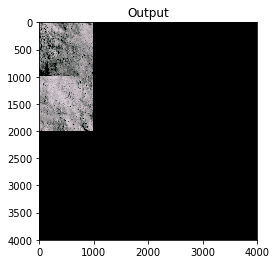

done


In [21]:
## test simple stitch, used to figure out if 2 images actually match
import sys

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

workDir = '../../../mapFiles/'
fileDirRead = workDir + 'map01/'
fileDirWrite = workDir + 'mapOut01/'

img1 = cv.imread(fileDirRead + 'HighresScreenshot00000.png', -1)
img2 = cv.imread(fileDirRead + 'HighresScreenshot00001.png', -1)




blockSize = 1000

imgSize = 4*blockSize

imgOut = np.zeros((imgSize,imgSize,4), np.uint8)


imgOut[0:blockSize,0:blockSize] = img1
imgOut[blockSize:blockSize*2,0:blockSize] = img2




plt.subplot(111),plt.imshow(cv.cvtColor(imgOut,cv.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

print('done')





start
new ../../../mapFiles/map01/HighresScreenshot00025.png
new ../../../mapFiles/map01/HighresScreenshot00050.png
new ../../../mapFiles/map01/HighresScreenshot00075.png
new ../../../mapFiles/map01/HighresScreenshot00100.png
new ../../../mapFiles/map01/HighresScreenshot00125.png
end read
WriteSmall


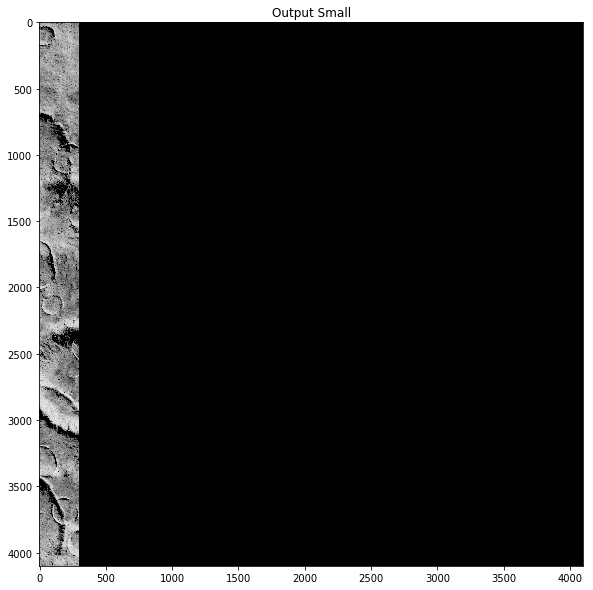

../../../mapFiles/mapOut01/splitImages_0.png
../../../mapFiles/mapOut01/splitImages_1.png
../../../mapFiles/mapOut01/splitImages_2.png
../../../mapFiles/mapOut01/splitImages_3.png
../../../mapFiles/mapOut01/splitImages_4.png
../../../mapFiles/mapOut01/splitImages_5.png
../../../mapFiles/mapOut01/splitImages_6.png
../../../mapFiles/mapOut01/splitImages_7.png
../../../mapFiles/mapOut01/splitImages_8.png
../../../mapFiles/mapOut01/splitImages_9.png
../../../mapFiles/mapOut01/splitImages_10.png
../../../mapFiles/mapOut01/splitImages_11.png
../../../mapFiles/mapOut01/splitImages_12.png
../../../mapFiles/mapOut01/splitImages_13.png
../../../mapFiles/mapOut01/splitImages_14.png
../../../mapFiles/mapOut01/splitImages_15.png
../../../mapFiles/mapOut01/splitImages_16.png
../../../mapFiles/mapOut01/splitImages_17.png
../../../mapFiles/mapOut01/splitImages_18.png
../../../mapFiles/mapOut01/splitImages_19.png
../../../mapFiles/mapOut01/splitImages_20.png
../../../mapFiles/mapOut01/splitImages_21.pn

In [22]:
# big map

import sys

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

blockSize = 1000
imgSize = 42*blockSize


imgOut = np.zeros((imgSize,imgSize,4), np.uint8)

workDir = '../../../mapFiles/'
fileDirRead = workDir + 'map01/'
fileDirWrite = workDir + 'mapOut01/'

print('start')

fullCounter = 0
nameCounter = 0
displayCount = 0


# Loop reads and stitches images into one big image
for j in range(0,41):

    for i in range(41,-1,-1):
        
        filename = fileDirRead + 'HighresScreenshot' + str(fullCounter).zfill(5) + '.png'
        fullCounter += 1
        nameCounter += 1
        img = cv.imread(filename, -1)
        
        if img is None:
            print('error: image ' + str(fullCounter) + ' not found')
            fullCounter += 1
            filename = fileDirRead + 'HighresScreenshot' + str(fullCounter).zfill(5) + '.png'
            img = cv.imread(filename, -1)
        
        imgOut[i*blockSize:(i+1)*blockSize,blockSize*j:blockSize*(j+1)] = img
        
        if displayCount == 25:
            displayCount = 0
            print('new ' + filename)
        #print('fullCounter = ' + str(fullCounter) + ' - nameCounter = ' + str(nameCounter) + ' - i = ' + str(i) + ' - j = ' + str(j))
        displayCount += 1
        

print('end read')




#make image greyscale
imgOut = cv.cvtColor(imgOut,cv.COLOR_BGR2GRAY)

#remap image to correct size
imgOut = imgOut[0:41000,0:41000]


#write out small size version for checking
small = cv.resize(imgOut, (0,0), fx=0.1, fy=0.1) 
cv.imwrite(workDir + 'mapOut_small.png',small)
print('WriteSmall')

#plot small image to jupyter notebook
plt.figure(figsize=(10,10))  
plt.subplot(111),plt.imshow(cv.cvtColor(small,cv.COLOR_GRAY2RGB)),plt.title('Output Small')
plt.show()

newCount = 0
for j in range(0,8):
    for i in range(0,8):
        filename2 = fileDirWrite + 'splitImages_' + str(newCount) + '.png' 
        print(filename2)
        imgOutSmall = imgOut[i*5000:i*5000+6000,5000*j:j*5000+6000]
        cv.imwrite(filename2,imgOutSmall)
        newCount += 1

print('WriteBig')




start
new ../../../mapFiles/map01/HighresScreenshot00025.png
new ../../../mapFiles/map01/HighresScreenshot00050.png
new ../../../mapFiles/map01/HighresScreenshot00075.png
new ../../../mapFiles/map01/HighresScreenshot00100.png
new ../../../mapFiles/map01/HighresScreenshot00125.png
new ../../../mapFiles/map01/HighresScreenshot00150.png
new ../../../mapFiles/map01/HighresScreenshot00175.png
new ../../../mapFiles/map01/HighresScreenshot00200.png
new ../../../mapFiles/map01/HighresScreenshot00225.png
new ../../../mapFiles/map01/HighresScreenshot00250.png
new ../../../mapFiles/map01/HighresScreenshot00275.png
new ../../../mapFiles/map01/HighresScreenshot00300.png
new ../../../mapFiles/map01/HighresScreenshot00325.png
new ../../../mapFiles/map01/HighresScreenshot00350.png
error: image 370 not found
new ../../../mapFiles/map01/HighresScreenshot00376.png
new ../../../mapFiles/map01/HighresScreenshot00401.png
new ../../../mapFiles/map01/HighresScreenshot00426.png
new ../../../mapFiles/map01/High

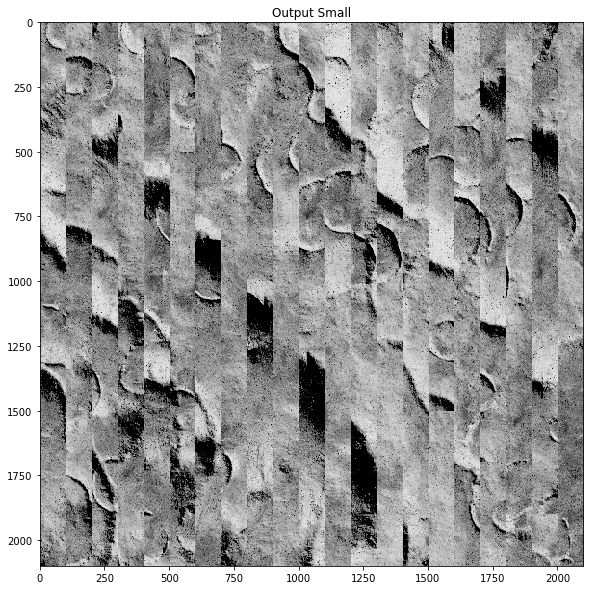

../../../mapFiles/mapOut01/splitImages_0.png
../../../mapFiles/mapOut01/splitImages_1.png
../../../mapFiles/mapOut01/splitImages_2.png
../../../mapFiles/mapOut01/splitImages_3.png
../../../mapFiles/mapOut01/splitImages_4.png
../../../mapFiles/mapOut01/splitImages_5.png
../../../mapFiles/mapOut01/splitImages_6.png
../../../mapFiles/mapOut01/splitImages_7.png
../../../mapFiles/mapOut01/splitImages_8.png
../../../mapFiles/mapOut01/splitImages_9.png
../../../mapFiles/mapOut01/splitImages_10.png
../../../mapFiles/mapOut01/splitImages_11.png
../../../mapFiles/mapOut01/splitImages_12.png
../../../mapFiles/mapOut01/splitImages_13.png
../../../mapFiles/mapOut01/splitImages_14.png
../../../mapFiles/mapOut01/splitImages_15.png
WriteBig


In [23]:
# small map

import sys

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

blockSize = 1000
imgSize = 22*blockSize


imgOut = np.zeros((imgSize,imgSize,4), np.uint8)

workDir = '../../../mapFiles/'
fileDirRead = workDir + 'map01/'
fileDirWrite = workDir + 'mapOut01/'



print('start')

fullCounter = 0
nameCounter = 0
displayCount = 0

for j in range(0,21):


    for i in range(21,-1,-1):
        
        filename = fileDirRead + 'HighresScreenshot' + str(fullCounter).zfill(5) + '.png'
        fullCounter += 1
        nameCounter += 1
        img = cv.imread(filename, -1)
        
        if img is None:
            print('error: image ' + str(fullCounter) + ' not found')
            fullCounter += 1
            filename = fileDirRead + 'HighresScreenshot' + str(fullCounter).zfill(5) + '.png'
            img = cv.imread(filename, -1)
        
        imgOut[i*blockSize:(i+1)*blockSize,blockSize*j:blockSize*(j+1)] = img
        
        if displayCount == 25:
            displayCount = 0
            print('new ' + filename)
        #print('fullCounter = ' + str(fullCounter) + ' - nameCounter = ' + str(nameCounter) + ' - i = ' + str(i) + ' - j = ' + str(j))
        displayCount += 1
        



print('end read')




#make image greyscale
imgOut = cv.cvtColor(imgOut,cv.COLOR_BGR2GRAY)

#remap image to correct size
imgOut = imgOut[1000:22000,0:21000]


#write out small size version for checking
small = cv.resize(imgOut, (0,0), fx=0.1, fy=0.1) 
cv.imwrite(workDir + 'map.png',small)
print('WriteSmall')

#plot small image to jupyter notebook
plt.figure(figsize=(10,10))  
plt.subplot(111),plt.imshow(cv.cvtColor(small,cv.COLOR_GRAY2RGB)),plt.title('Output Small')
plt.show()




newCount = 0
for j in range(0,4):
    for i in range(0,4):
        filename2 = fileDirWrite + 'splitImages_' + str(newCount) + '.png' 
        print(filename2)
        imgOutSmall = imgOut[i*5000:i*5000+6000,5000*j:j*5000+6000]
        cv.imwrite(filename2,imgOutSmall)
        newCount += 1


print('WriteBig')
